In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, balanced_accuracy_score

import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('final_proteins_dataframe.csv', index_col=0)
df

,pdb_id,chain_id,sequence,residue,residue_number,res_index,pdb_res_index,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y,U,avg_hydrophobicity,avg_hydrophilicity,avg_nci,avg_polarity,avg_polarizability,avg_sasa,avg_vol,hydrophobicity,hydrophilicity,NCI,polarity,polarizability,SASA,vol,is_charged,tm_segment
0,1vgo,A,DLLNDGRPETLWLGIGTLLMLIGTFYFIARGWGVTDKEAREYYAIT...,D,3,0,5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.003333,0.433333,0.040025,9.400000,0.119333,1.595333,54.283333,-0.90,3.0,-0.023820,13.0,0.105,1.587,40.0,1,0
1,1vgo,A,DLLNDGRPETLWLGIGTLLMLIGTFYFIARGWGVTDKEAREYYAIT...,L,10,1,6,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,-0.502000,1.120000,0.056747,13.380000,0.201400,2.426400,86.140000,1.06,-1.8,0.051672,4.9,0.186,1.931,93.5,0,0
2,1vgo,A,DLLNDGRPETLWLGIGTLLMLIGTFYFIARGWGVTDKEAREYYAIT...,L,10,2,7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,-0.107500,0.200000,0.149690,16.700000,0.304750,3.486000,131.525000,1.06,-1.8,0.051672,4.9,0.186,1.931,93.5,0,0
3,1vgo,A,DLLNDGRPETLWLGIGTLLMLIGTFYFIARGWGVTDKEAREYYAIT...,N,12,3,8,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,-1.656667,3.533333,0.161263,31.300000,0.412333,5.062000,166.600000,-0.78,0.2,0.005392,11.6,0.134,1.655,58.7,0,0
4,1vgo,A,DLLNDGRPETLWLGIGTLLMLIGTFYFIARGWGVTDKEAREYYAIT...,D,3,4,9,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,-3.675000,7.400000,0.326357,52.750000,0.658000,8.283000,251.950000,-0.90,3.0,-0.023820,13.0,0.105,1.587,40.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138182,7b0o,A,LYFQGHMDRLITLVVSYSIAFSIFALATMAVVYGKWLYYFEIDFLN...,V,18,211,206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,-2.920000,2.650000,0.182683,41.500000,1.173500,11.068500,501.550000,1.08,-1.5,0.057004,5.9,0.140,1.645,71.5,0,0
138183,7b0o,A,LYFQGHMDRLITLVVSYSIAFSIFALATMAVVYGKWLYYFEIDFLN...,K,9,212,207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,2.0,-2.300000,2.366667,0.104565,26.033333,0.720333,6.735333,303.200000,-1.50,3.0,0.017708,11.3,0.219,2.258,100.0,1,0
138184,7b0o,A,LYFQGHMDRLITLVVSYSIAFSIFALATMAVVYGKWLYYFEIDFLN...,K,9,213,208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,3.0,-1.790000,2.350000,0.070333,17.975000,0.465750,4.459500,198.075000,-1.50,3.0,0.017708,11.3,0.219,2.258,100.0,1,0
138185,7b0o,A,LYFQGHMDRLITLVVSYSIAFSIFALATMAVVYGKWLYYFEIDFLN...,K,9,214,209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0,-0.926000,1.280000,0.047549,12.280000,0.314400,3.055600,137.460000,-1.50,3.0,0.017708,11.3,0.219,2.258,100.0,1,0


In [4]:
X = df.iloc[:, 0:43]
X = X.drop(['chain_id'], axis=1)
X = X.drop(['sequence'], axis=1)
X = X.drop(['residue'], axis=1)
X = X.drop(['pdb_res_index'], axis=1)
y = df['tm_segment']
X

,pdb_id,residue_number,res_index,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y,U,avg_hydrophobicity,avg_hydrophilicity,avg_nci,avg_polarity,avg_polarizability,avg_sasa,avg_vol,hydrophobicity,hydrophilicity,NCI,polarity,polarizability,SASA,vol,is_charged
0,1vgo,3,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.003333,0.433333,0.040025,9.400000,0.119333,1.595333,54.283333,-0.90,3.0,-0.023820,13.0,0.105,1.587,40.0,1
1,1vgo,10,1,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,-0.502000,1.120000,0.056747,13.380000,0.201400,2.426400,86.140000,1.06,-1.8,0.051672,4.9,0.186,1.931,93.5,0
2,1vgo,10,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,-0.107500,0.200000,0.149690,16.700000,0.304750,3.486000,131.525000,1.06,-1.8,0.051672,4.9,0.186,1.931,93.5,0
3,1vgo,12,3,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,-1.656667,3.533333,0.161263,31.300000,0.412333,5.062000,166.600000,-0.78,0.2,0.005392,11.6,0.134,1.655,58.7,0
4,1vgo,3,4,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,-3.675000,7.400000,0.326357,52.750000,0.658000,8.283000,251.950000,-0.90,3.0,-0.023820,13.0,0.105,1.587,40.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138182,7b0o,18,211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,-2.920000,2.650000,0.182683,41.500000,1.173500,11.068500,501.550000,1.08,-1.5,0.057004,5.9,0.140,1.645,71.5,0
138183,7b0o,9,212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,2.0,-2.300000,2.366667,0.104565,26.033333,0.720333,6.735333,303.200000,-1.50,3.0,0.017708,11.3,0.219,2.258,100.0,1
138184,7b0o,9,213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,3.0,-1.790000,2.350000,0.070333,17.975000,0.465750,4.459500,198.075000,-1.50,3.0,0.017708,11.3,0.219,2.258,100.0,1
138185,7b0o,9,214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0,-0.926000,1.280000,0.047549,12.280000,0.314400,3.055600,137.460000,-1.50,3.0,0.017708,11.3,0.219,2.258,100.0,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False) # 7 indicates that always get the same split of data each time this example is executed

In [8]:
# fit model with the optimal parameters in the training set
model = lgb.LGBMClassifier(learning_rate = 0.01, max_depth = 20, num_leaves = 70, num_iterations = 300, n_estimators = 300, reg_alpha = 1.1, reg_lambda = 1.1, subsample = 0.9, subsample_freq = 20, colsample_bytree = 0.8, objective='binary')

model.fit(X_train.drop(['pdb_id'], axis=1) ,y_train, verbose=20, eval_metric=['auc', 'logloss', 'average_precision'])

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, max_depth=20,
               n_estimators=300, num_iterations=300, num_leaves=70,
               objective='binary', reg_alpha=1.1, reg_lambda=1.1, subsample=0.9,
               subsample_freq=20)

### Proteins' Prediction

In [9]:
# Prediction of 10 random proteins from the test set
pdbs = ['6wm5', '7b0o', '6h59', '4rp9', '5mm0', '5xj7', '7cqm', '6cb2', '7cff', '7b0p']

y_true = {}

for pdb in pdbs:
  protein = X_test.loc[X_test['pdb_id'] == pdb].copy()
  protein = protein.drop(['pdb_id'], axis=1)
  y_true[pdb] = y_test.loc[protein.index[0]:protein[len(protein) -1:].index[0]].copy()

  # make predictions for test data
  y_pred = model.predict(protein)

  print("For protein " + pdb)

  # evaluate predictions
  accuracy = accuracy_score(y_true[pdb], y_pred)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))

  # evaluate predictions
  # accuracy_bl = balanced_accuracy_score(y_true[pdb], y_pred)
  # print("Balanced accuracy: %.2f%%" % (accuracy_bl * 100.0))

  # roc_score = roc_auc_score(y_true[pdb], model.predict_proba(protein)[:, 1])
  # print("Roc: %.2f%%" % (roc_score* 100.0))

  # f1 = f1_score(y_true[pdb], y_pred)
  # print("F1 score: %.2f%%" % (f1* 100.0))
  print()

For protein 6wm5
Accuracy: 66.47%

For protein 7b0o
Accuracy: 81.02%

For protein 6h59
Accuracy: 76.02%

For protein 4rp9
Accuracy: 72.95%

For protein 5mm0
Accuracy: 86.20%

For protein 5xj7
Accuracy: 80.73%

For protein 7cqm
Accuracy: 86.50%

For protein 6cb2
Accuracy: 78.15%

For protein 7cff
Accuracy: 66.67%

For protein 7b0p
Accuracy: 83.48%



In [156]:
deelLearn = 'IIIIIIIIIIIIIIIIIIIIIIIIIIMMMMMMMMMMMMMMMMMMMOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMMMMIIIIIIIIIIMMMMMMMMMMMMMMMMMMMMOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMMIIIIIIIIIIIIIIIII'
topcons = 'iiiiiiiiiiiiiiiiiiiiiiiiMMMMMMMMMMMMMMMMMMMMMoooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooMMMMMMMMMMMMMMMMMMMMMiiiiiiiiiMMMMMMMMMMMMMMMMMMMMMooooooooooooooooooooooooooooooooooMMMMMMMMMMMMMMMMMMMMMiiiiiiiiiiiiiiiiiii'
octopus = 'iiiiiiiiiiiiiiiiiiiiiiiiMMMMMMMMMMMMMMMMMMMMMooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooMMMMMMMMMMMMMMMMMMMMMiiiiiiiiiiMMMMMMMMMMMMMMMMMMMMMoooooooooooooooooooooooooooooooooMMMMMMMMMMMMMMMMMMMMMiiiiiiiiiiiiiiiiiiii'

protein_len = 233
start_prot = 9
deelLearnPred = []

for index, char in enumerate(deelLearn):
  if index >= start_prot and index < protein_len:
    if char == 'O':
      deelLearnPred.append(0)
    else:
      deelLearnPred.append(1)

topconsPred = []

for index, char in enumerate(topcons):
  if index >= start_prot and index < protein_len:
    if char == 'o':
      topconsPred.append(0)
    else:
      topconsPred.append(1)

octopusPred = []

for index, char in enumerate(octopus):
  if index >= start_prot and index < protein_len:
    if char == 'o':
      octopusPred.append(0)
    else:
      octopusPred.append(1)

# show predictions
print("DeepLearn accuracy: %.2f%%" % (accuracy_score(y_true['7b0p'], deelLearnPred) * 100.0))
print("Topcons accuracy: %.2f%%" % (accuracy_score(y_true['7b0p'], topconsPred) * 100.0))
print("Octopus accuracy: %.2f%%" % (accuracy_score(y_true['7b0p'], octopusPred) * 100.0))


224
DeepLearn accuracy: 82.14%
Topcons accuracy: 83.04%
Octopus accuracy: 83.04%


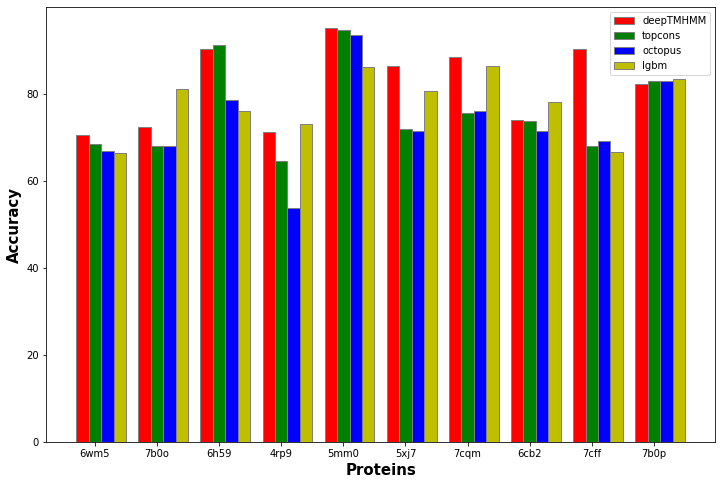

In [9]:
prot_pred = ["6wm5","7b0o", "6h59", "4rp9", "5mm0", "5xj7", "7cqm", "6cb2", "7cff", "7b0p"]

deepTMHMM = [70.62,72.46,90.31,71.18,95.21,86.46,88.50,74.07,90.38,82.14]
topcons = [68.55,68.00,91.33,64.52,94.65,71.88,75.50,73.70,67.95,83.04]
octopus = [66.77,67.93,78.57,53.66,93.52,71.35,76.00,71.48,69.23,83.04]
lgbm = [66.47,81.02,76.02,72.95,86.20,80.73,86.50,78.15,66.67,83.48]


import numpy as np
import matplotlib.pyplot as plt
 
barWidth = 0.20
fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(deepTMHMM))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, deepTMHMM, color ='r', width = barWidth,
        edgecolor ='grey', label ='deepTMHMM')
plt.bar(br2, topcons, color ='g', width = barWidth,
        edgecolor ='grey', label ='topcons')
plt.bar(br3, octopus, color ='b', width = barWidth,
        edgecolor ='grey', label ='octopus')
plt.bar(br4, lgbm, color ='y', width = barWidth,
        edgecolor ='grey', label ='lgbm')

# Adding Xticks
plt.xlabel('Proteins', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(deepTMHMM))], prot_pred)
 
plt.legend()
plt.show()